#Sentiment Analysis of #COVID19 from Twitter

#Task 1

#Import libraries

In [34]:
#Import libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Authentication

In [35]:
#Authentication
consumerKey = 'zWCRP0CBswtfDyIj5BpF0oiI1'
consumerSecret = '2sQUdrmIK1cEZtVowa6ZAgjam6m91UepGaU79UYZaIyWidzjUw'
accessToken = '990033890-TkJmNuCaQhOAnCupUZfZmRdpGl4JWy5dd6J1VaRe'
accessTokenSecret = 'eKxjKkjtaOVoCCL9AfKhAKuJbhjut8E86vLbgbLYW76LK'

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#5,000 Tweet gathering

In [36]:
#Gather 5000 tweets about #COVID19 and filter out any retweets 'RT'
search_term = '#COVID19 -filter:retweets AND -filter:replies'

#Create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since="2021-03-18", tweet_mode= 'extended').items(5000)

#Store the tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

Rate limit reached. Sleeping for: 440
Rate limit reached. Sleeping for: 863


#Display gathered tweets

In [343]:
all_tweets[0:50]

['Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP',
 "#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic",
 'Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa',
 'Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schools

In [344]:
pd.set_option('display.max_colwidth', None)
#Create a dataframe to store the tweets with a column called 'Tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#Show the first 50 rows of data
df.head(50)

,Tweets
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP"
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic"
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa"
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19"
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt"
5,"Out Now: '#SoutheastAsia and #COVID19 #Vaccines Explained'.\n\nRichard Maude, executive director, policy @AsiaSocietyAus and senior fellow at @AsiaPolicy outlines Southeast Asia's #vaccination rollout.\n\n#covax\nhttps://t.co/X3cVVym8iI"
6,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. \nSupport us at\nhttps://t.co/2zZSe7ZSqe\n\n#fundraiser #mentalhealth #artforcharity #covid19
7,#LargestVaccineDrive\n\n#𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀𝐓𝐄\n\n▶️ More than 29.35 Cr vaccine doses provided to States/UTs.\n\n▶️ More than 2.98 Cr doses still available with States/UTs to be administered.\n\nDetails: https://t.co/UNO6OB6Pcq\n\n#We4Vaccine https://t.co/jMqu8R3hRC
8,"“Until we learn more”? I’m sorry, you’re FORCING everyone to take this vaccine, stating “it’s safe” and yet you don’t even know something as basic as if it prevents transmission? Shouldn’t you know EVERYTHING about it before you force it on people? #COVID19 #Toronto #Ontario https://t.co/HxWbQZmNzK"
9,Know the signs and symptoms of #COVID19; keep safe and/or seek medical assistance in time. #YouthInAgricUg #StaySafe #StayHome https://t.co/j8dG3Ih0Ze


#Task 2

#1st Wash

In [345]:
def cleanTwt(twt):
  twt = re.sub('[0-9]', '', twt) #Removes any string with numeric
  twt = re.sub('#covid19', 'covid19', twt) #Removes #
  twt = re.sub('#Covid19', 'covid19', twt) #Removes #
  twt = re.sub('#COVID19', 'covid19', twt) #Removes #
  twt = re.sub('#covid_19', 'covid19', twt) #Removes #
  twt = re.sub('#Covid_19', 'covid19', twt) #Removes #
  twt = re.sub('#COVID_19', 'covid19', twt) #Removes #
  twt = re.sub('#covid', 'covid19', twt) #Removes #
  twt = re.sub('#Covid', 'covid19', twt) #Removes #
  twt = re.sub('#COVID', 'covid19', twt) #Removes #
  twt = re.sub('@[A-Za-z0-9]+', '', twt) #Removes any string with  '@'
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #Removes any string with  '#'
  twt = re.sub('&amp', '', twt) #Removes any string with  '&amp'  
  twt = re.sub('\\n', '', twt) #Removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #Removes any hyperlinks
  return twt

In [346]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show the data set
df.head(50)

,Tweets,Cleaned_Tweets
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19."
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination"
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19"
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19"
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt","Keep calm, and stretch out to your own tunes... covid19india covid19"
5,"Out Now: '#SoutheastAsia and #COVID19 #Vaccines Explained'.\n\nRichard Maude, executive director, policy @AsiaSocietyAus and senior fellow at @AsiaPolicy outlines Southeast Asia's #vaccination rollout.\n\n#covax\nhttps://t.co/X3cVVym8iI","Out Now: ' and covid19 Explained'.Richard Maude, executive director, policy and senior fellow at outlines Southeast Asia's rollout."
6,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. \nSupport us at\nhttps://t.co/2zZSe7ZSqe\n\n#fundraiser #mentalhealth #artforcharity #covid19,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. Support us at covid19
7,#LargestVaccineDrive\n\n#𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀𝐓𝐄\n\n▶️ More than 29.35 Cr vaccine doses provided to States/UTs.\n\n▶️ More than 2.98 Cr doses still available with States/UTs to be administered.\n\nDetails: https://t.co/UNO6OB6Pcq\n\n#We4Vaccine https://t.co/jMqu8R3hRC,#𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀𝐓𝐄▶️ More than . Cr vaccine doses provided to States/UTs.▶️ More than . Cr doses still available with States/UTs to be administered.Details:
8,"“Until we learn more”? I’m sorry, you’re FORCING everyone to take this vaccine, stating “it’s safe” and yet you don’t even know something as basic as if it prevents transmission? Shouldn’t you know EVERYTHING about it before you force it on people? #COVID19 #Toronto #Ontario https://t.co/HxWbQZmNzK","“Until we learn more”? I’m sorry, you’re FORCING everyone to take this vaccine, stating “it’s safe” and yet you don’t even know something as basic as if it prevents transmission? Shouldn’t you know EVERYTHING about it before you force it 

#Convert Emoji

In [347]:
!pip install emoji
import emoji

#Convert emoji, not emoticon
df['super_Cleaned_Tweets'] = df['Cleaned_Tweets'].apply(emoji.demojize)
df.head(50)

,Tweets,Cleaned_Tweets,super_Cleaned_Tweets
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19."
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination"
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19"
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19"
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt","Keep calm, and stretch out to your own tunes... covid19india covid19","Keep calm, and stretch out to your own tunes... covid19india covid19"
5,"Out Now: '#SoutheastAsia and #COVID19 #Vaccines Explained'.\n\nRichard Maude, executive director, policy @AsiaSocietyAus and senior fellow at @AsiaPolicy outlines Southeast Asia's #vaccination rollout.\n\n#covax\nhttps://t.co/X3cVVym8iI","Out Now: ' and covid19 Explained'.Richard Maude, executive director, policy and senior fellow at outlines Southeast Asia's rollout.","Out Now: ' and covid19 Explained'.Richard Maude, executive director, policy and senior fellow at outlines Southeast Asia's rollout."
6,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. \nSupport us at\nhttps://t.co/2zZSe7ZSqe\n\n#fundraiser #mentalhealth #artforcharity #covid19,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. Support us at c

#Remove Emoticon

In [348]:
!pip install emot
import emot
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

#Remove emoticon, not emoji
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df['super_Cleaned_Tweets'] = df['super_Cleaned_Tweets'].apply(remove_emoticons)
df.head(50)


,Tweets,Cleaned_Tweets,super_Cleaned_Tweets
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19."
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination"
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19"
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19"
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt","Keep calm, and stretch out to your own tunes... covid19india covid19","Keep calm, and stretch out to your own tunes... covid19india covid19"
5,"Out Now: '#SoutheastAsia and #COVID19 #Vaccines Explained'.\n\nRichard Maude, executive director, policy @AsiaSocietyAus and senior fellow at @AsiaPolicy outlines Southeast Asia's #vaccination rollout.\n\n#covax\nhttps://t.co/X3cVVym8iI","Out Now: ' and covid19 Explained'.Richard Maude, executive director, policy and senior fellow at outlines Southeast Asia's rollout.","Out Now: ' and covid19 Explained'.Richard Maude, executive director, policy and senior fellow at outlines Southeast Asia's rollout."
6,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. \nSupport us at\nhttps://t.co/2zZSe7ZSqe\n\n#fundraiser #mentalhealth #artforcharity #covid19,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. Support us at c

#Lowercase

In [349]:
#Lowercasing
df['super_Cleaned_Tweets']  = df['super_Cleaned_Tweets'].str.lower()
df.head(50)

,Tweets,Cleaned_Tweets,super_Cleaned_Tweets
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.","boussignac is particularly useful in the epidemiological context. it can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19."
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination","| central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19vaccination"
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19","physical devastation aside, covid has become a grave human tragedy, causing widespread psychological injury, nimhans chief k. sekar tells in an . but he also sees hope amid the gloom. covid19"
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19","schools and educational institutes reopened across sindh after the government relaxed covid- restrictions in wake of a decline in the number of infections, local media reported monday. covid19"
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt","Keep calm, and stretch out to your own tunes... covid19india covid19","keep calm, and stretch out to your own tunes... covid19india covid19"
5,"Out Now: '#SoutheastAsia and #COVID19 #Vaccines Explained'.\n\nRichard Maude, executive director, policy @AsiaSocietyAus and senior fellow at @AsiaPolicy outlines Southeast Asia's #vaccination rollout.\n\n#covax\nhttps://t.co/X3cVVym8iI","Out Now: ' and covid19 Explained'.Richard Maude, executive director, policy and senior fellow at outlines Southeast Asia's rollout.","out now: ' and covid19 explained'.richard maude, executive director, policy and senior fellow at outlines southeast asia's rollout."
6,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. \nSupport us at\nhttps://t.co/2zZSe7ZSqe\n\n#fundraiser #mentalhealth #artforcharity #covid19,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. Support us at c

#Remove Punctuation

In [350]:
#Removing punctuation
df['super_Cleaned_Tweets'] = df['super_Cleaned_Tweets'].str.replace('[^\w\s]','')
df.head(50)

,Tweets,Cleaned_Tweets,super_Cleaned_Tweets
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.",boussignac is particularly useful in the epidemiological context it can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization making it ideal for use with covid19
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination",central govts free covid19 vaccination policy for all adults kicks off from today preregistration on is not mandatory covid19vaccination
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19",physical devastation aside covid has become a grave human tragedy causing widespread psychological injury nimhans chief k sekar tells in an but he also sees hope amid the gloom covid19
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19",schools and educational institutes reopened across sindh after the government relaxed covid restrictions in wake of a decline in the number of infections local media reported monday covid19
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt","Keep calm, and stretch out to your own tunes... covid19india covid19",keep calm and stretch out to your own tunes covid19india covid19
5,"Out Now: '#SoutheastAsia and #COVID19 #Vaccines Explained'.\n\nRichard Maude, executive director, policy @AsiaSocietyAus and senior fellow at @AsiaPolicy outlines Southeast Asia's #vaccination rollout.\n\n#covax\nhttps://t.co/X3cVVym8iI","Out Now: ' and covid19 Explained'.Richard Maude, executive director, policy and senior fellow at outlines Southeast Asia's rollout.",out now and covid19 explainedrichard maude executive director policy and senior fellow at outlines southeast asias rollout
6,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. \nSupport us at\nhttps://t.co/2zZSe7ZSqe\n\n#fundraiser #mentalhealth #artforcharity #covid19,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. Support us at covid19,sharadhi j katti speaks about her ex

#Remove Stopwords

In [351]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

#Remove the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['super_Cleaned_Tweets'] = df['super_Cleaned_Tweets'].apply(stopwords)
df.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweets,Cleaned_Tweets,super_Cleaned_Tweets
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.",boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination",central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19",physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19",schools educational institutes reopened across sindh government relaxed covid restrictions wake decline number infections local media reported monday covid19
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt","Keep calm, and stretch out to your own tunes... covid19india covid19",keep calm stretch tunes covid19india covid19
5,"Out Now: '#SoutheastAsia and #COVID19 #Vaccines Explained'.\n\nRichard Maude, executive director, policy @AsiaSocietyAus and senior fellow at @AsiaPolicy outlines Southeast Asia's #vaccination rollout.\n\n#covax\nhttps://t.co/X3cVVym8iI","Out Now: ' and covid19 Explained'.Richard Maude, executive director, policy and senior fellow at outlines Southeast Asia's rollout.",covid19 explainedrichard maude executive director policy senior fellow outlines southeast asias rollout
6,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. \nSupport us at\nhttps://t.co/2zZSe7ZSqe\n\n#fundraiser #mentalhealth #artforcharity #covid19,Sharadhi. J. Katti speaks about her experience with our clinical team and why she contributed to our art fundraiser to support mental healthcare during the pandemic. Support us at covid19,sharadhi j katti speaks experience clinical team contributed art fundraiser support mental healthcare pandemic support us covid19
7,#LargestVaccineDrive\n\n#𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀𝐓𝐄\n\n▶️ More than 29.35 

#Tokenization

In [352]:
import nltk
nltk.download('punkt')
tweetText = df['super_Cleaned_Tweets']
from nltk.tokenize import word_tokenize

df['token_super_Cleaned_Tweets'] = tweetText.apply(word_tokenize)
df.head(50)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Tweets,Cleaned_Tweets,super_Cleaned_Tweets,token_super_Cleaned_Tweets
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.",boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19,"[boussignac, particularly, useful, epidemiological, context, used, soon, patient, develops, first, clinical, signs, respiratory, difficulty, requiring, hospitalization, making, ideal, use, covid19]"
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination",central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination,"[central, govts, free, covid19, vaccination, policy, adults, kicks, today, preregistration, mandatory, covid19vaccination]"
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19",physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19,"[physical, devastation, aside, covid, become, grave, human, tragedy, causing, widespread, psychological, injury, nimhans, chief, k, sekar, tells, also, sees, hope, amid, gloom, covid19]"
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19",schools educational institutes reopened across sindh government relaxed covid restrictions wake decline number infections local media reported monday covid19,"[schools, educational, institutes, reopened, across, sindh, government, relaxed, covid, restrictions, wake, decline, number, infections, local, media, reported, monday, covid19]"
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt","Keep calm, and stretch out to your own tunes... covid19india covid19",keep calm stretch tunes covid19india covid19,"[keep, calm, stretch, tunes, covid19india, covid19]"
5,"Out Now: '#SoutheastAsia and #COVID19 #Vaccines Explained'.\n\nRichard Maude, executive director, policy @AsiaSocietyAus and senior fellow at @AsiaPolicy outlines Southeast Asia's #vaccination rollout.\n\n#covax\nhttps://t.co/X3cVVym8iI","Out Now: ' and covid19 Explained'.Richard Maude, executive director, policy and senior fellow at outlines Southeast Asi

#Task 3

#TextBlob Sentiment

In [353]:
df = df.applymap(str) #Convert to string from list

#Create a function to get the subjectivity
def getSubjectivity(token_super_Cleaned_Tweets):
  return TextBlob(token_super_Cleaned_Tweets).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(token_super_Cleaned_Tweets):
  return TextBlob(token_super_Cleaned_Tweets).sentiment.polarity

#Create two new columns called 'Subjectivity" & 'Polarity'
df['Subjectivity'] = df['token_super_Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['token_super_Cleaned_Tweets'].apply(getPolarity)

df.head(50)

,Tweets,Cleaned_Tweets,super_Cleaned_Tweets,token_super_Cleaned_Tweets,Subjectivity,Polarity
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.",boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19,"['boussignac', 'particularly', 'useful', 'epidemiological', 'context', 'used', 'soon', 'patient', 'develops', 'first', 'clinical', 'signs', 'respiratory', 'difficulty', 'requiring', 'hospitalization', 'making', 'ideal', 'use', 'covid19']",0.444444,0.483333
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination",central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination,"['central', 'govts', 'free', 'covid19', 'vaccination', 'policy', 'adults', 'kicks', 'today', 'preregistration', 'mandatory', 'covid19vaccination']",0.525000,0.200000
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19",physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19,"['physical', 'devastation', 'aside', 'covid', 'become', 'grave', 'human', 'tragedy', 'causing', 'widespread', 'psychological', 'injury', 'nimhans', 'chief', 'k', 'sekar', 'tells', 'also', 'sees', 'hope', 'amid', 'gloom', 'covid19']",0.119048,-0.033333
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19",schools educational institutes reopened across sindh government relaxed covid restrictions wake decline number infections local media reported monday covid19,"['schools', 'educational', 'institutes', 'reopened', 'across', 'sindh', 'government', 'relaxed', 'covid', 'restrictions', 'wake', 'decline', 'number', 'infections', 'local', 'media', 'reported', 'monday', 'covid19']",0.125000,0.125000
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt","Keep calm, and stretch out to your own tunes... covid19india covid19",keep calm stretch tunes covid19india covid19,"['keep', 'calm', 'stretch', 'tunes', 'covid19india', 'covid19']",0.750000,0.300000
5,"Out Now: '#SoutheastAsia and #COVID19 #Vaccines Explained'.\n\nRichard Maude, executi

In [354]:
#Create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [355]:
#Create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(50)

,Tweets,Cleaned_Tweets,super_Cleaned_Tweets,token_super_Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.",boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19,"['boussignac', 'particularly', 'useful', 'epidemiological', 'context', 'used', 'soon', 'patient', 'develops', 'first', 'clinical', 'signs', 'respiratory', 'difficulty', 'requiring', 'hospitalization', 'making', 'ideal', 'use', 'covid19']",0.444444,0.483333,Positive
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination",central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination,"['central', 'govts', 'free', 'covid19', 'vaccination', 'policy', 'adults', 'kicks', 'today', 'preregistration', 'mandatory', 'covid19vaccination']",0.525000,0.200000,Positive
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19",physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19,"['physical', 'devastation', 'aside', 'covid', 'become', 'grave', 'human', 'tragedy', 'causing', 'widespread', 'psychological', 'injury', 'nimhans', 'chief', 'k', 'sekar', 'tells', 'also', 'sees', 'hope', 'amid', 'gloom', 'covid19']",0.119048,-0.033333,Negative
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19",schools educational institutes reopened across sindh government relaxed covid restrictions wake decline number infections local media reported monday covid19,"['schools', 'educational', 'institutes', 'reopened', 'across', 'sindh', 'government', 'relaxed', 'covid', 'restrictions', 'wake', 'decline', 'number', 'infections', 'local', 'media', 'reported', 'monday', 'covid19']",0.125000,0.125000,Positive
4,"Keep calm, and stretch out to your own tunes\n.\n.\n.\n#gozocabs #india #travel #travelgram #travel2021 #cabservicesindia #stayhomestaysafe #love #indiafightscovid19 #wearyourmask #womensafety #safety #safetyfirst #stayindoors #covidindia #musicday #covid19 #instadaily #localbusiness https://t.co/5H2fGsyRBt","Keep calm, and stretch out to your own tunes... covid19india covid19",keep calm stretch tunes covid19india covid19,"['keep', 'calm', 'stretch', 'tunes', 'covid19india', 'covid19']",0.750000,0.300000,Positive
5,"Out Now: '#SoutheastAsia and #

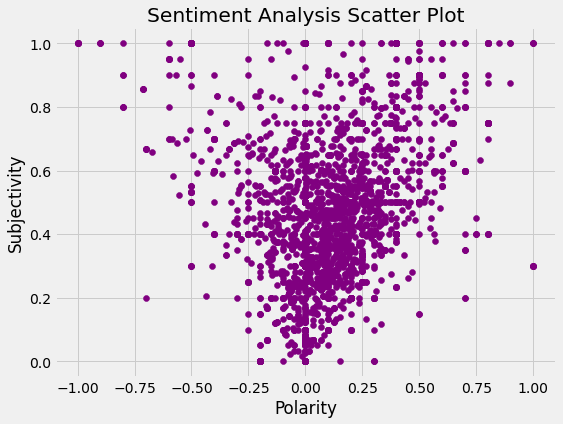

In [356]:
#Create a scatter plot to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Positive    2640
Neutral     1693
Negative     667
Name: Sentiment, dtype: int64


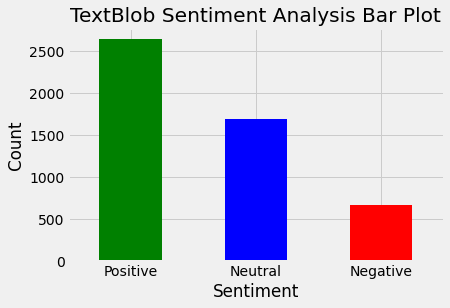

In [357]:
#Display results and create a bar chart to show the count of Positive, Neutral and Negative Sentiments
textblob_result = df['Sentiment'].value_counts()
print(textblob_result)
df['Sentiment'].value_counts().plot(kind='bar', rot=0, color = ['green', 'blue', 'red'])
plt.title('TextBlob Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [358]:
#Get the percentage of positive tweets
ptweets = df[df.Sentiment == 'Positive']
ptweets = ptweets['token_super_Cleaned_Tweets']

round( (ptweets.shape[0]/df.shape[0]) *100 ,1)

52.8

In [359]:
ptweets

0                                         ['boussignac', 'particularly', 'useful', 'epidemiological', 'context', 'used', 'soon', 'patient', 'develops', 'first', 'clinical', 'signs', 'respiratory', 'difficulty', 'requiring', 'hospitalization', 'making', 'ideal', 'use', 'covid19']
1                                                                                                                                    ['central', 'govts', 'free', 'covid19', 'vaccination', 'policy', 'adults', 'kicks', 'today', 'preregistration', 'mandatory', 'covid19vaccination']
3                                                               ['schools', 'educational', 'institutes', 'reopened', 'across', 'sindh', 'government', 'relaxed', 'covid', 'restrictions', 'wake', 'decline', 'number', 'infections', 'local', 'media', 'reported', 'monday', 'covid19']
4                                                                                                                                                               

In [360]:
#Get the percentage of negative tweets
ntweets = df[df.Sentiment == 'Negative']
ntweets = ntweets['token_super_Cleaned_Tweets']

round( (ntweets.shape[0]/df.shape[0]) *100 ,1)

13.3

In [361]:
ntweets

2                                                                                                  ['physical', 'devastation', 'aside', 'covid', 'become', 'grave', 'human', 'tragedy', 'causing', 'widespread', 'psychological', 'injury', 'nimhans', 'chief', 'k', 'sekar', 'tells', 'also', 'sees', 'hope', 'amid', 'gloom', 'covid19']
6                                                                                                                                                    ['sharadhi', 'j', 'katti', 'speaks', 'experience', 'clinical', 'team', 'contributed', 'art', 'fundraiser', 'support', 'mental', 'healthcare', 'pandemic', 'support', 'us', 'covid19']
11                                                                                   ['want', 'die', 'early', 'horrific', 'side', 'effects', 'rest', 'life', 'please', 'means', 'take', 'dangerous', 'experimental', 'untested', 'unlicensed', 'synthetic', 'gene', 'altering', 'toxic', 'biological', 'agent', 'death', 'jab', 'covid19']
20     

In [362]:
#Removing punctuation, creating a new column
df['wordcloud_token_super_Cleaned_Tweets'] = df['token_super_Cleaned_Tweets'].str.replace('[^\w\s]','')
df.head(10)

,Tweets,Cleaned_Tweets,super_Cleaned_Tweets,token_super_Cleaned_Tweets,Subjectivity,Polarity,Sentiment,wordcloud_token_super_Cleaned_Tweets
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.",boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19,"['boussignac', 'particularly', 'useful', 'epidemiological', 'context', 'used', 'soon', 'patient', 'develops', 'first', 'clinical', 'signs', 'respiratory', 'difficulty', 'requiring', 'hospitalization', 'making', 'ideal', 'use', 'covid19']",0.444444,0.483333,Positive,boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination",central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination,"['central', 'govts', 'free', 'covid19', 'vaccination', 'policy', 'adults', 'kicks', 'today', 'preregistration', 'mandatory', 'covid19vaccination']",0.525000,0.200000,Positive,central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19",physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19,"['physical', 'devastation', 'aside', 'covid', 'become', 'grave', 'human', 'tragedy', 'causing', 'widespread', 'psychological', 'injury', 'nimhans', 'chief', 'k', 'sekar', 'tells', 'also', 'sees', 'hope', 'amid', 'gloom', 'covid19']",0.119048,-0.033333,Negative,physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19",schools educational institutes reopened across sindh government relaxed covid restrictions wake decline number infections local media reported monday covid19,"['schools', 'educational', 'institutes', 'reopened', 'across', 'sindh', 'government', 'relaxed', 'covid', 'restrictions', 'wake', 'decline', 'number', 'infections', 'local', 'media', 'reported', 'monday', 'covid19']",0.125000,0.125000,Positive,schools educational institutes reopened across sindh government relax

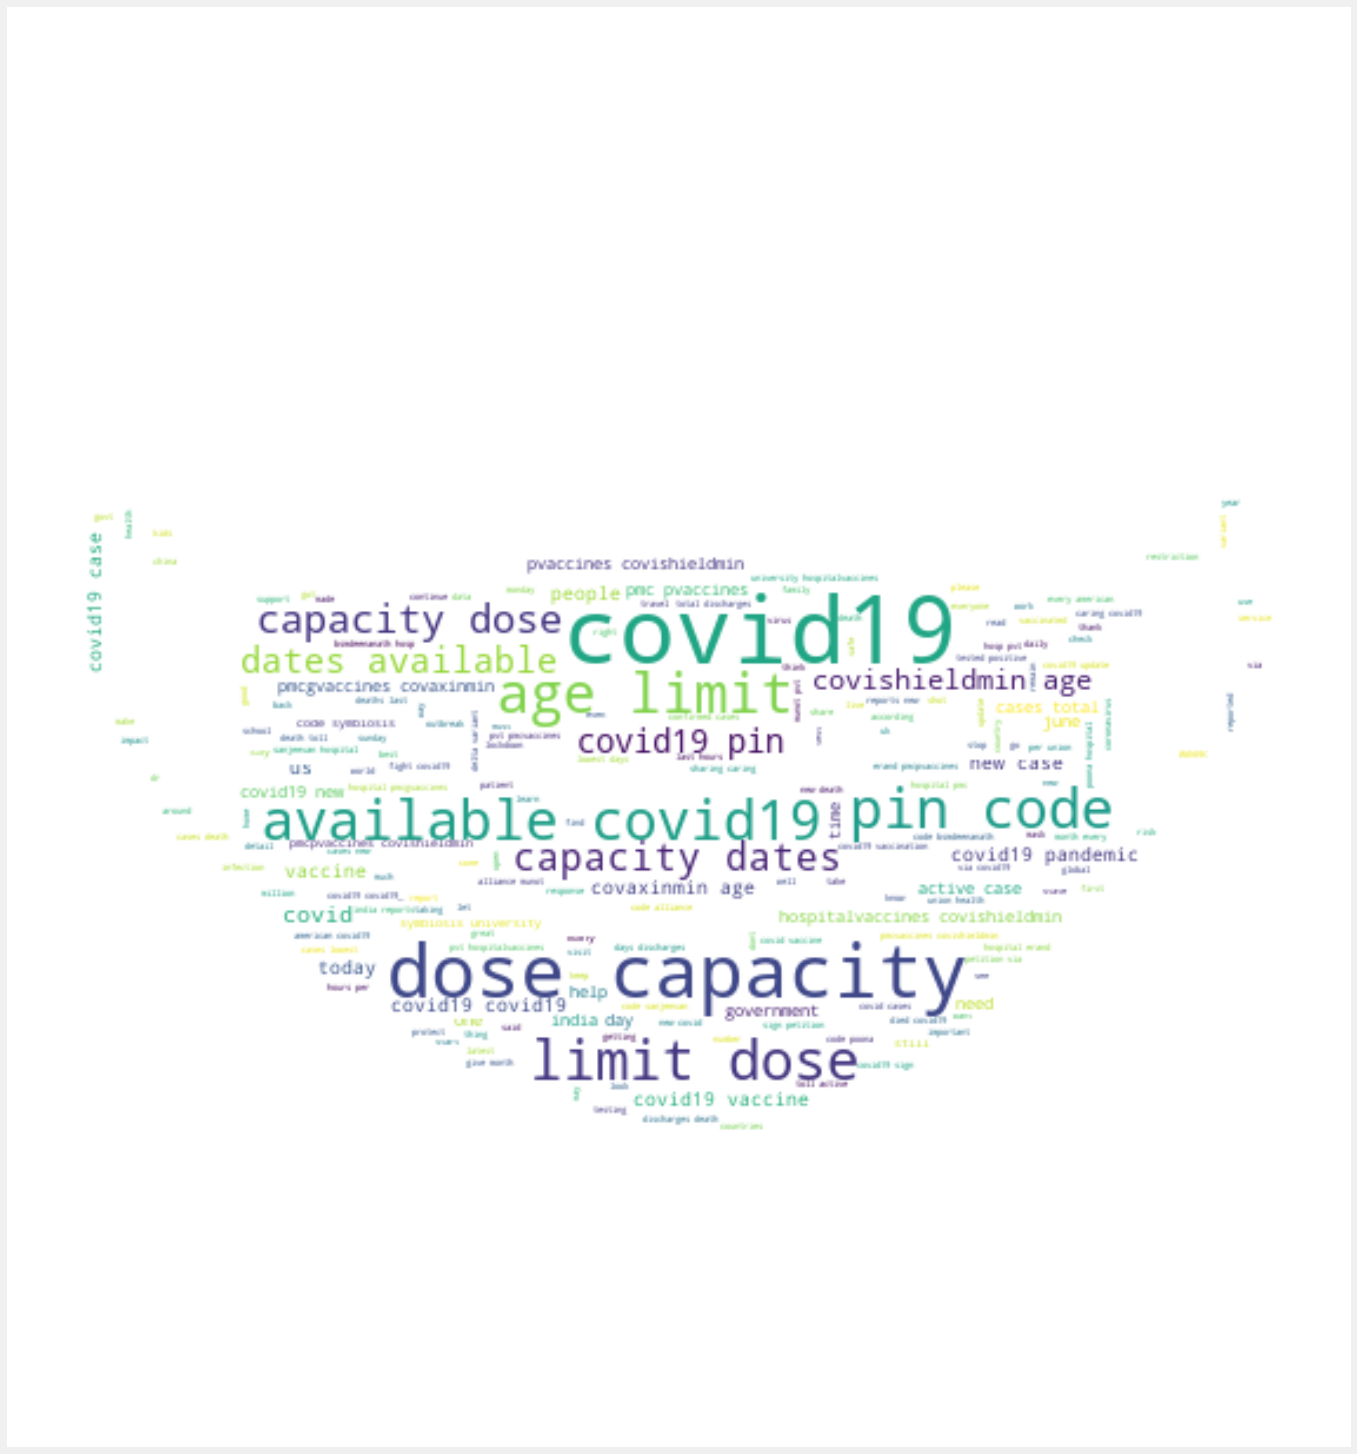

In [363]:
from wordcloud import WordCloud
from PIL import Image

#Plot the Word Cloud
mask = np.array(Image.open('/content/mask.jpg'))
allWords = ' '.join([twts for twts in df['wordcloud_token_super_Cleaned_Tweets']])
wordCloud = WordCloud(width = 1000, height= 500, background_color = 'white', random_state=42, mask=mask).generate(str(allWords))

plt.figure(figsize=(20,20))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#VADER sentiment

In [333]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [334]:
def sentiment(x):
  return analyzer.polarity_scores(x)

analyzer = SentimentIntensityAnalyzer()

df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['super_Cleaned_Tweets']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['super_Cleaned_Tweets']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['super_Cleaned_Tweets']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['super_Cleaned_Tweets']]

In [335]:
df.head(50)

,Tweets,Cleaned_Tweets,super_Cleaned_Tweets,token_super_Cleaned_Tweets,Subjectivity,Polarity,Sentiment,wordcloud_token_super_Cleaned_Tweets,compound,neg,neu,pos,sentiment
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.",boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19,"['boussignac', 'particularly', 'useful', 'epidemiological', 'context', 'used', 'soon', 'patient', 'develops', 'first', 'clinical', 'signs', 'respiratory', 'difficulty', 'requiring', 'hospitalization', 'making', 'ideal', 'use', 'covid19']",0.444444,0.483333,Positive,boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19,0.6361,0.092,0.654,0.254,Positive
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination",central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination,"['central', 'govts', 'free', 'covid19', 'vaccination', 'policy', 'adults', 'kicks', 'today', 'preregistration', 'mandatory', 'covid19vaccination']",0.525000,0.200000,Positive,central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination,0.5574,0.000,0.685,0.315,Positive
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19",physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19,"['physical', 'devastation', 'aside', 'covid', 'become', 'grave', 'human', 'tragedy', 'causing', 'widespread', 'psychological', 'injury', 'nimhans', 'chief', 'k', 'sekar', 'tells', 'also', 'sees', 'hope', 'amid', 'gloom', 'covid19']",0.119048,-0.033333,Negative,physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19,-0.9231,0.462,0.456,0.083,Negative
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19",schools educational institutes reopened across sindh government relaxed covid restrictions wake decline number infections local media reported monday covid19,"['schools', 'educational', 'institutes', 'reopened', 'across', 'sindh', 'government', 'relaxed', 'covid', 'restrictions', 'wake', 'decline', 'number', 'infections', 'local', 'medi

In [336]:
#Neutral, Positive or Negative Sentiment
df['sentiment'] = np.where(df['compound'] == 0, 'Neutral', (np.where(df['compound'] >= 0, 'Positive', 'Negative')))
df.head(50)

,Tweets,Cleaned_Tweets,super_Cleaned_Tweets,token_super_Cleaned_Tweets,Subjectivity,Polarity,Sentiment,wordcloud_token_super_Cleaned_Tweets,compound,neg,neu,pos,sentiment
0,"Boussignac #CPAP is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with #COVID19. #Vygon\n\nhttps://t.co/PvAEDYCAvP","Boussignac is particularly useful in the epidemiological context. It can be used as soon as the patient develops the first clinical signs of respiratory difficulty requiring hospitalization, making it ideal for use with covid19.",boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19,"['boussignac', 'particularly', 'useful', 'epidemiological', 'context', 'used', 'soon', 'patient', 'develops', 'first', 'clinical', 'signs', 'respiratory', 'difficulty', 'requiring', 'hospitalization', 'making', 'ideal', 'use', 'covid19']",0.444444,0.483333,Positive,boussignac particularly useful epidemiological context used soon patient develops first clinical signs respiratory difficulty requiring hospitalization making ideal use covid19,0.6361,0.092,0.654,0.254,Positive
1,"#Replug | Central govt's free #COVID19 vaccination policy for all adults kicks off from today, pre-registration on #Cowin is not mandatory\n\n@narendramodi #FreeVaccinationForAll #COVIDVaccination #MissionVaccination https://t.co/sOQ5EPAEic","| Central govt's free covid19 vaccination policy for all adults kicks off from today, pre-registration on is not mandatory covid19Vaccination",central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination,"['central', 'govts', 'free', 'covid19', 'vaccination', 'policy', 'adults', 'kicks', 'today', 'preregistration', 'mandatory', 'covid19vaccination']",0.525000,0.200000,Positive,central govts free covid19 vaccination policy adults kicks today preregistration mandatory covid19vaccination,0.5574,0.000,0.685,0.315,Positive
2,"Physical devastation aside, COVID19 has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells @InformistMedia in an #Interview. But he also sees hope amid the gloom. \n\n#COVID19 #MentalHealth #Psychology \n\nhttps://t.co/Slb5SIORsa","Physical devastation aside, COVID has become a grave human tragedy, causing widespread psychological injury, NIMHANS chief K. Sekar tells in an . But he also sees hope amid the gloom. covid19",physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19,"['physical', 'devastation', 'aside', 'covid', 'become', 'grave', 'human', 'tragedy', 'causing', 'widespread', 'psychological', 'injury', 'nimhans', 'chief', 'k', 'sekar', 'tells', 'also', 'sees', 'hope', 'amid', 'gloom', 'covid19']",0.119048,-0.033333,Negative,physical devastation aside covid become grave human tragedy causing widespread psychological injury nimhans chief k sekar tells also sees hope amid gloom covid19,-0.9231,0.462,0.456,0.083,Negative
3,"Schools and educational institutes reopened across Sindh after the government relaxed Covid-19 restrictions in wake of a decline in the number of infections, local media reported Monday.\n#schoolsreopening #COVID19","Schools and educational institutes reopened across Sindh after the government relaxed Covid- restrictions in wake of a decline in the number of infections, local media reported Monday. covid19",schools educational institutes reopened across sindh government relaxed covid restrictions wake decline number infections local media reported monday covid19,"['schools', 'educational', 'institutes', 'reopened', 'across', 'sindh', 'government', 'relaxed', 'covid', 'restrictions', 'wake', 'decline', 'number', 'infections', 'local', 'medi

Neutral     2019
Positive    1918
Negative    1063
Name: sentiment, dtype: int64


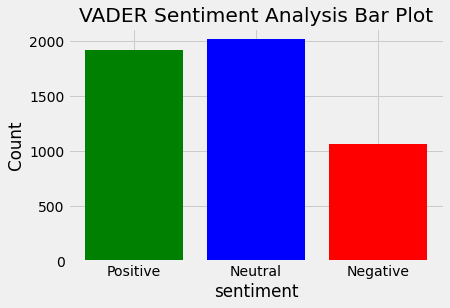

In [337]:
#Display results and create a bar chart to show the count of Positive, Neutral and Negative sentiments
result = df['sentiment'].value_counts()
print(result)

x = np.array(['Positive', 'Neutral', 'Negative'])
y = np.array([1918, 2019, 1063])
plt.bar(x, y, color = ['green', 'blue', 'red'] )
#result.plot( kind='bar', rot=0, color = ['blue', 'green', 'red'] )
plt.title('VADER Sentiment Analysis Bar Plot')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()